# Assignment A: Computer Vision (CS7GV1)
## Van Allen Bruns Jr - 19329560
#    

# Part 2: PCA
Read chapter 10 in the book ‘Mathematics for Machine Learning’ https://mml-book.github.io/book/mml-book.pdf.

## a. Compute the mean image and principal components for a set of images (e.g. use the training images of ‘5’ in the mnist dataset). Display the mean image and the first 2 principal components (associated with the highest eigenvalues).

In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mnist import MNIST

mndata = MNIST('./')
mndata.gz = True
images, labels = mndata.load_training()

images = pd.DataFrame(images)
labels = pd.DataFrame(labels)

# Get all the 5s
indices = labels.index[labels[0] == 5]

### The first 5 in the set.

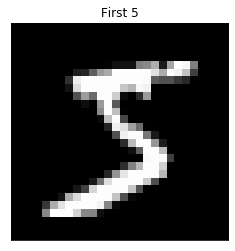

In [2]:
# Test that it loaded it by looking at the first '5'

plt.imshow(np.reshape(images.loc[indices[0],:].values, (28, 28)), cmap='gray')
plt.title('First 5')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### The mean image.

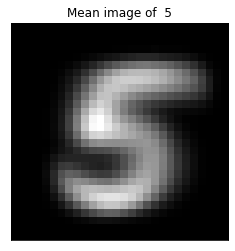

In [3]:
def getMeanImage(images, indices):
    mean_image = np.zeros(784)
    mean_image = np.float64(mean_image)
    mean_image = np.sum(images.loc[indices,:])
    mean_image = mean_image / len(indices)
    
    return np.uint8(mean_image)

mean_five = getMeanImage(images, indices)

plt.imshow(np.reshape(mean_five, (28, 28)), cmap='gray')
plt.title('Mean image of  5')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### The first 5 centered using the mean image.

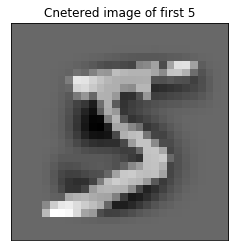

In [4]:
centered_fives = images.loc[indices,:] - mean_five

plt.imshow(np.reshape(centered_fives.loc[indices[0],:].values, (28, 28)), cmap='gray')
plt.title('Cnetered image of first 5')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### i. PCA components calculated using a PCA package.

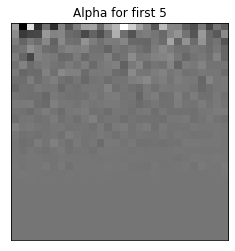

In [5]:
pca = PCA()
pca.fit(centered_fives)

image_pca = pca.transform(centered_fives)

plt.imshow(np.reshape(image_pca[0], (28, 28)), cmap='gray')
plt.title('Alpha for first 5')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### FIrst principle component.

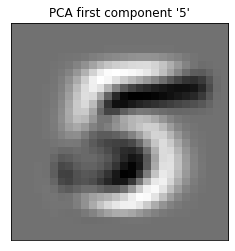

In [6]:
plt.imshow(np.reshape(pca.components_[0], (28, 28)), cmap='gray')
plt.title('PCA first component \'5\'')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Second principle component.

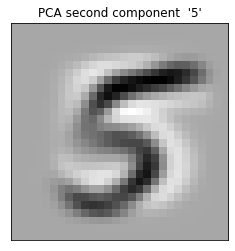

In [7]:
plt.imshow(np.reshape(pca.components_[1], (28, 28)), cmap='gray')
plt.title('PCA second component  \'5\'')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### ii. Eigenvectors calculated from the centered fives (using math, not PCA package). This is ultimately used for reconstruction.

### The first 5 transformed using the eigenvectors (appear to be in an opposite order to the PCA package).

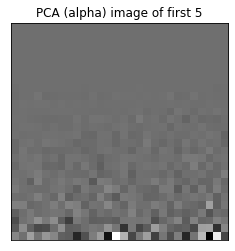

In [8]:
def getEigVec(centered_numbers):
    image_cov = centered_numbers.cov()
    image_cov = image_cov.fillna(0)
    image_eigval, image_eigvec = np.linalg.eigh(image_cov)
    
    return image_eigvec

image_eigvec = getEigVec(centered_fives)

image_pca = np.dot(centered_fives, image_eigvec)

plt.imshow(np.reshape(image_pca[indices[0],:], (28, 28)), cmap='gray')
plt.title('PCA (alpha) image of first 5')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### First principle component (expected it to be like the PCA component, so there must be an additional calculation).

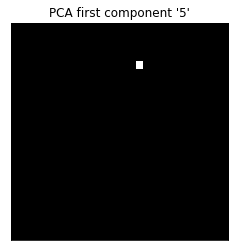

In [9]:
plt.imshow(np.reshape(image_eigvec[783], (28, 28)), cmap='gray')
plt.title('PCA first component \'5\'')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Second principle component (again, not expected).

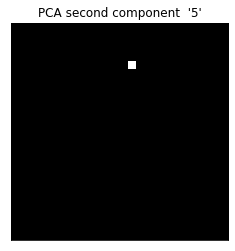

In [10]:
plt.imshow(np.reshape(image_eigvec[782], (28, 28)), cmap='gray')
plt.title('PCA second component  \'5\'')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

#### *MNIST package from: https://pypi.org/project/python-mnist/
#### *Required MNIST files from: http://yann.lecun.com/exdb/mnist/

## b. Compute and display the reconstructions of a test image using the mean image and with p principal  components  associated  with  the p highest  eigenvalues (e.g.  Fig  10.12) with p=10 and p=50.

### As can be seen below, most of the data for the 5 comes in using 50 principle components (with a bit of rounding instead of straight strokes). 100 principle components gives us the straight strokes of the pen.

### Reconstruction of the first 5 using the first 10 principle components.

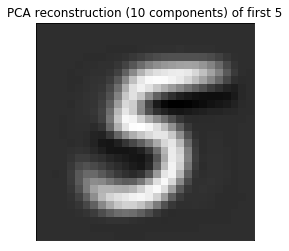

In [11]:
num_components = 10

image_rec = np.dot(image_pca[:,784 - num_components:784], image_eigvec[:,784 - num_components:784].T) + mean_five

plt.imshow(np.reshape(image_rec[0,:], (28, 28)), cmap='gray')
plt.title('PCA reconstruction (10 components) of first 5')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Reconstruction of the first 5 using the first 50 principle components.

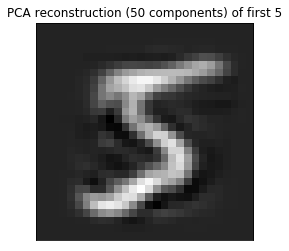

In [12]:
num_components = 50

image_rec = np.dot(image_pca[:,784 - num_components:784], image_eigvec[:,784 - num_components:784].T) + mean_five

plt.imshow(np.reshape(image_rec[0,:], (28, 28)), cmap='gray')
plt.title('PCA reconstruction (50 components) of first 5')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Reconstruction of the first 5 using the first 100 principle components.

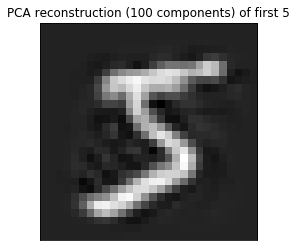

In [13]:
num_components = 100

image_rec = np.dot(image_pca[:,784 - num_components:784], image_eigvec[:,784 - num_components:784].T) + mean_five

plt.imshow(np.reshape(image_rec[0,:], (28, 28)), cmap='gray')
plt.title('PCA reconstruction (100 components) of first 5')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Reconstruction of the first 5 using the first 200 principle components.

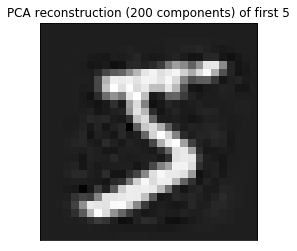

In [14]:
num_components = 200

image_rec = np.dot(image_pca[:,784 - num_components:784], image_eigvec[:,784 - num_components:784].T) + mean_five

plt.imshow(np.reshape(image_rec[0,:], (28, 28)), cmap='gray')
plt.title('PCA reconstruction (200 components) of first 5')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Reconstruction of the first 5 using the first 300 principle components.

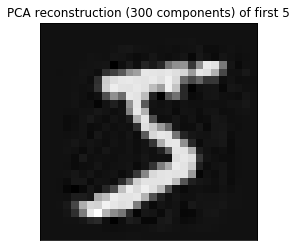

In [15]:
num_components = 300

image_rec = np.dot(image_pca[:,784 - num_components:784], image_eigvec[:,784 - num_components:784].T) + mean_five

plt.imshow(np.reshape(image_rec[0,:], (28, 28)), cmap='gray')
plt.title('PCA reconstruction (300 components) of first 5')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Reconstruction of the first 5 using all principle components.

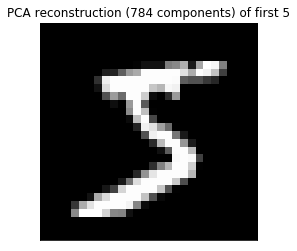

In [16]:
num_components = 784

image_rec = np.dot(image_pca[:,784 - num_components:784], image_eigvec[:,784 - num_components:784].T) + mean_five

plt.imshow(np.reshape(image_rec[0,:], (28, 28)), cmap='gray')
plt.title('PCA reconstruction (784 components) of first 5')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## c. Read https://doi.org/10.1109/34.598227 ‘Probabilistic visual learning for object representation’ (PAMI1997). Compute and display a DFFS (distance-from feature-space) and SSD (sum-of-square-differences) heat maps for detection using your PCA representation of a MNIST number. For the test image, use a composite image made of MNIST test images (see example below).

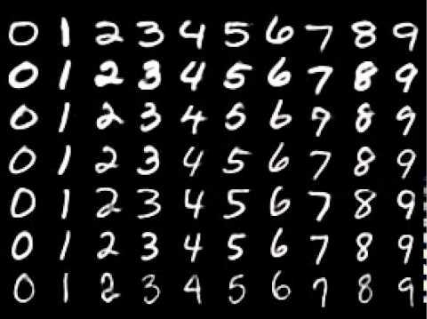

### Construction of the test image, and calculation of all needed values for later (mean images for each number, all numbers centered, eigenvectors for each number).

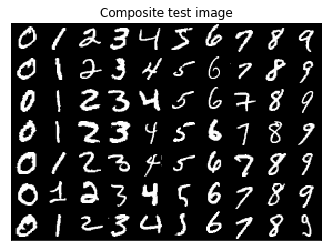

In [17]:
def setupCompImageEnv(images, labels, digit_range):
    selectedIndices = np.zeros(70)
    mean_images = np.zeros(10*28*28)
    mean_images = np.reshape(mean_images, (10, 28, 28))
    eig_vecs = np.zeros(10*784*784)
    eig_vecs = np.reshape(eig_vecs, (10, 784, 784))

    for i in range(10):
        cur_ind = labels.index[labels[0] == i]
        mean_image = getMeanImage(images, cur_ind)
        mean_images[i,:,:] = np.reshape(mean_image, (28, 28))
        eig_vecs[i,:,:] = getEigVec(images.loc[cur_ind,:] - mean_image)
        selectedIndices[[i,i + 10,i + 20,i + 30,i + 40,i + 50,i + 60]] = cur_ind[digit_range]

    image_comp = np.zeros(70*28*28)

    # Has to be an easier way to do this in python, but my brain doesn't think in python!
    for i in range(70*28):
        image_comp[i * 28: (i + 1) * 28] = images.loc[selectedIndices[int(i/280)*10 + i%10],:].values[int(i/10)%28 * 28: (int(i/10)%28 + 1) * 28]

    image_comp = np.reshape(image_comp, (28*7, 28*10))
    
    return image_comp, mean_images, eig_vecs
    
image_comp, mean_images, eig_vecs = setupCompImageEnv(images, labels, range(7))
    
plt.imshow(image_comp, cmap='gray')
plt.title('Composite test image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### SSD using the 5 mean image.

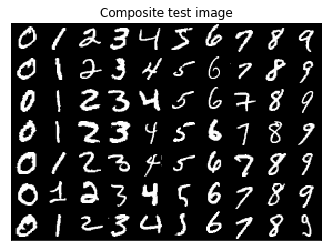

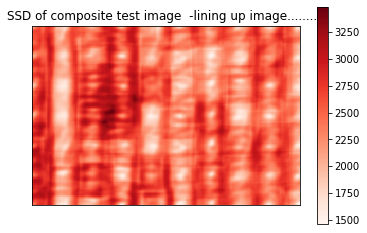

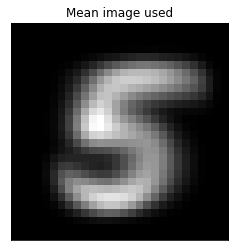

In [18]:
def calcSSD(image_comp, mean_image):
    width = len(image_comp) - 27
    height = len(image_comp[0]) - 27
    ssd = np.zeros(width * height)
    ssd = np.reshape(ssd, (width, height))

    for i in range(width):
        for j in range(height):
            ssd[i, j] = np.linalg.norm(image_comp[i:i + 28,j:j + 28] - mean_image)
    
    return ssd
    
selected_mean_image = 5

ssd = calcSSD(image_comp, mean_images[selected_mean_image])

plt.imshow(image_comp, cmap='gray')
plt.title('Composite test image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(ssd, cmap='Reds')
plt.title('SSD of composite test image  -lining up image..........')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.colorbar()
plt.show()

plt.imshow(mean_images[selected_mean_image], cmap='gray')
plt.title('Mean image used')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### DFFS using the 5 mean image.

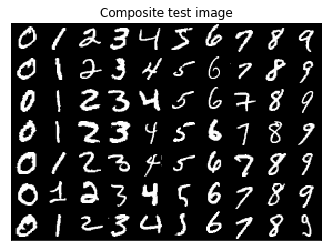

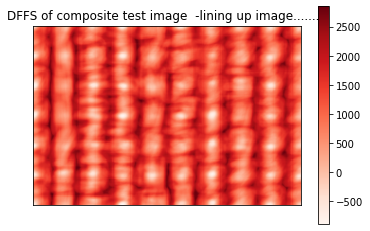

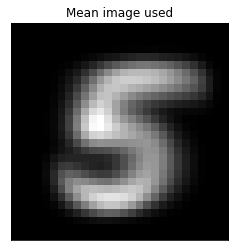

In [19]:
def calcDFFS(image_comp, mean_image, eigen_vectors, num_components):
    width = len(image_comp) - 27
    height = len(image_comp[0]) - 27
    dffs = np.zeros(width * height)
    dffs = np.reshape(dffs, (width, height))

    for i in range(width):
        for j in range(height):
            image_pca = np.dot(image_comp[i:i+28,j:j+28].flatten() - mean_image.flatten(), eigen_vectors)
            image_rec = np.dot(image_pca[784 - num_components:784], eigen_vectors[:,784 - num_components:784].T) + mean_image.flatten()
            image_rec = np.reshape(image_rec, (28, 28))
            dffs[i, j] = ssd[i, j] - np.linalg.norm(image_rec)
    
    return dffs
        
dffs = calcDFFS(image_comp, mean_images[selected_mean_image], eig_vecs[selected_mean_image], 50)
    
plt.imshow(image_comp, cmap='gray')
plt.title('Composite test image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(dffs, cmap='Reds')
plt.title('DFFS of composite test image  -lining up image.........')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.colorbar()
plt.show()

plt.imshow(mean_images[selected_mean_image], cmap='gray')
plt.title('Mean image used')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## d. Evaluate the performance of SSD and DFFS (i.e. illustrate when it works, and when it does not work).

### From the previous results of SSD and DFFS for the 5s, we can see that SSD tends to find the "skinny digits", and the digits with broad strokes are less identified. DFFS seems to have the opposite, identifying more of the broader strokes, but it isn't nearly as sensitve as SSD.

### SSD is also faster than DFFS, as it is simply a subtraction compared to a reconstruction using PCA of DFFS.

### Selecting better digits from the dataset, and looking for the 7s. We can see here that SSD identifies the 7s well, but it also picks up most of the 1s. DFFS is actually similar.

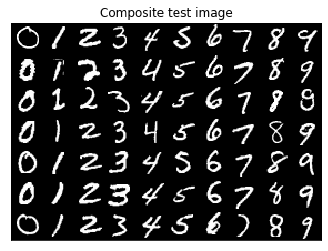

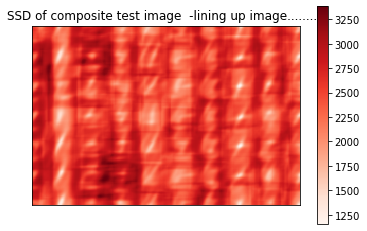

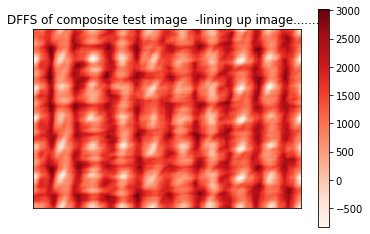

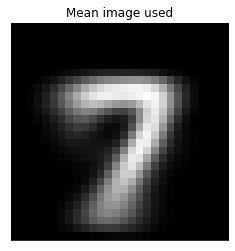

In [20]:
image_comp, mean_images, eig_vecs = setupCompImageEnv(images, labels, range(7, 14))

selected_mean_image = 7

ssd = calcSSD(image_comp, mean_images[selected_mean_image])
dffs = calcDFFS(image_comp, mean_images[selected_mean_image], eig_vecs[selected_mean_image], 50)

#ssd = np.log(ssd)
#ssd[ssd == -np.inf] = 0

#dffs = np.log(dffs)
#dffs[dffs == -np.inf] = 0

plt.imshow(image_comp, cmap='gray')
plt.title('Composite test image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(ssd, cmap='Reds')
plt.title('SSD of composite test image  -lining up image..........')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.colorbar()
plt.show()

plt.imshow(dffs, cmap='Reds')
plt.title('DFFS of composite test image  -lining up image.........')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.colorbar()
plt.show()

plt.imshow(mean_images[selected_mean_image], cmap='gray')
plt.title('Mean image used')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### The 6s seem easier to identify, as both SSD and DFFS pick them up without find the wrong ones (though DFFS wants to select the 0s).

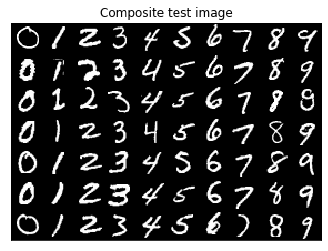

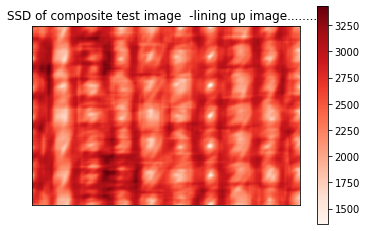

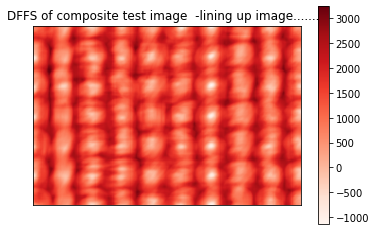

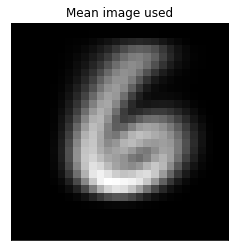

In [21]:
image_comp, mean_images, eig_vecs = setupCompImageEnv(images, labels, range(7, 14))

selected_mean_image = 6

ssd = calcSSD(image_comp, mean_images[selected_mean_image])
dffs = calcDFFS(image_comp, mean_images[selected_mean_image], eig_vecs[selected_mean_image], 50)

#ssd = np.log(ssd)
#ssd[ssd == -np.inf] = 0

#dffs = np.log(dffs)
#dffs[dffs == -np.inf] = 0

plt.imshow(image_comp, cmap='gray')
plt.title('Composite test image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(ssd, cmap='Reds')
plt.title('SSD of composite test image  -lining up image..........')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.colorbar()
plt.show()

plt.imshow(dffs, cmap='Reds')
plt.title('DFFS of composite test image  -lining up image.........')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.colorbar()
plt.show()

plt.imshow(mean_images[selected_mean_image], cmap='gray')
plt.title('Mean image used')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### The 3s are similar to the 6s, except SSD doesn't pick them all up, and even DFFS misses one.

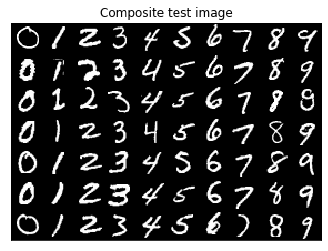

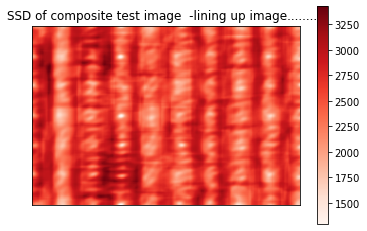

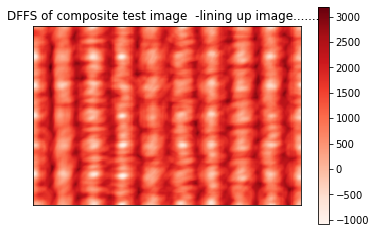

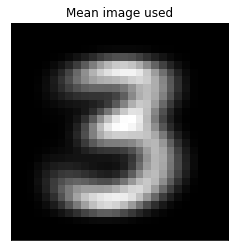

In [22]:
image_comp, mean_images, eig_vecs = setupCompImageEnv(images, labels, range(7, 14))

selected_mean_image = 3

ssd = calcSSD(image_comp, mean_images[selected_mean_image])
dffs = calcDFFS(image_comp, mean_images[selected_mean_image], eig_vecs[selected_mean_image], 50)

#ssd = np.log(ssd)
#ssd[ssd == -np.inf] = 0

#dffs = np.log(dffs)
#dffs[dffs == -np.inf] = 0

plt.imshow(image_comp, cmap='gray')
plt.title('Composite test image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(ssd, cmap='Reds')
plt.title('SSD of composite test image  -lining up image..........')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.colorbar()
plt.show()

plt.imshow(dffs, cmap='Reds')
plt.title('DFFS of composite test image  -lining up image.........')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.colorbar()
plt.show()

plt.imshow(mean_images[selected_mean_image], cmap='gray')
plt.title('Mean image used')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Taking the digits as a set (whole column), and using the log of SSD and DFFS multiplied together, we can identify which column is which number (except for 3s and 5s).

/home/van/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


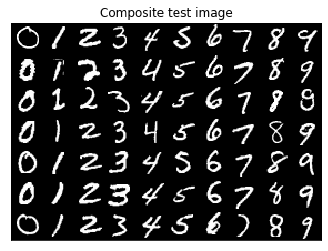

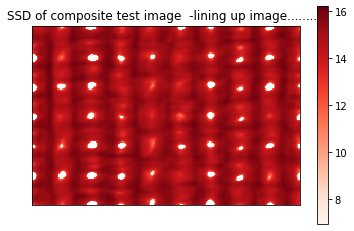

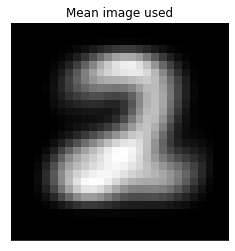

In [23]:
image_comp, mean_images, eig_vecs = setupCompImageEnv(images, labels, range(7, 14))

selected_mean_image = 2

ssd = calcSSD(image_comp, mean_images[selected_mean_image])
dffs = calcDFFS(image_comp, mean_images[selected_mean_image], eig_vecs[selected_mean_image], 50)

both = ssd * dffs

both = np.log(both)
both[both == -np.inf] = 0

plt.imshow(image_comp, cmap='gray')
plt.title('Composite test image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(both, cmap='Reds')
plt.title('SSD of composite test image  -lining up image..........')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.colorbar()
plt.show()

plt.imshow(mean_images[selected_mean_image], cmap='gray')
plt.title('Mean image used')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()